## Exploratory Data Analysis


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [12]:
orig_df = pd.read_csv("../train.csv")
test_df = pd.read_csv("../test.csv")
n_cat = 116
n_cont = 14
id_df = orig_df.iloc[:, 0]
id_test_df = test_df.iloc[:, 0]
cat_df = orig_df.iloc[:, 1:n_cat+1]
cat_test_df = test_df.iloc[:, 1:n_cat+1]
cont_df = orig_df.iloc[:, n_cat+1:-1]
cont_test_df = test_df.iloc[:, n_cat+1:-1]
target = pd.DataFrame(orig_df.iloc[:, -1])
orig_df.drop("id", axis=1, inplace=True)

### Summary Statistics

* Training set contains 188318 entries.
* Continuous values all positive.

In [4]:
print(orig_df.describe())

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

In [5]:
# Skew. Closer to 0 => less skew. Loss (target) has the greatest skew.
print(orig_df.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


### Visualizations

* cont1 peaks around 0.5
* cont2 has many peaks
* cont3 peaks around 0.5
* cont5 significantly peaks around 0.3
* cont13 peaks around 0.3
* cont14 peaks at the high and low ends, around 0.8 and 0.2
* log(1+loss) peaks around 8, and is close to normally distributed

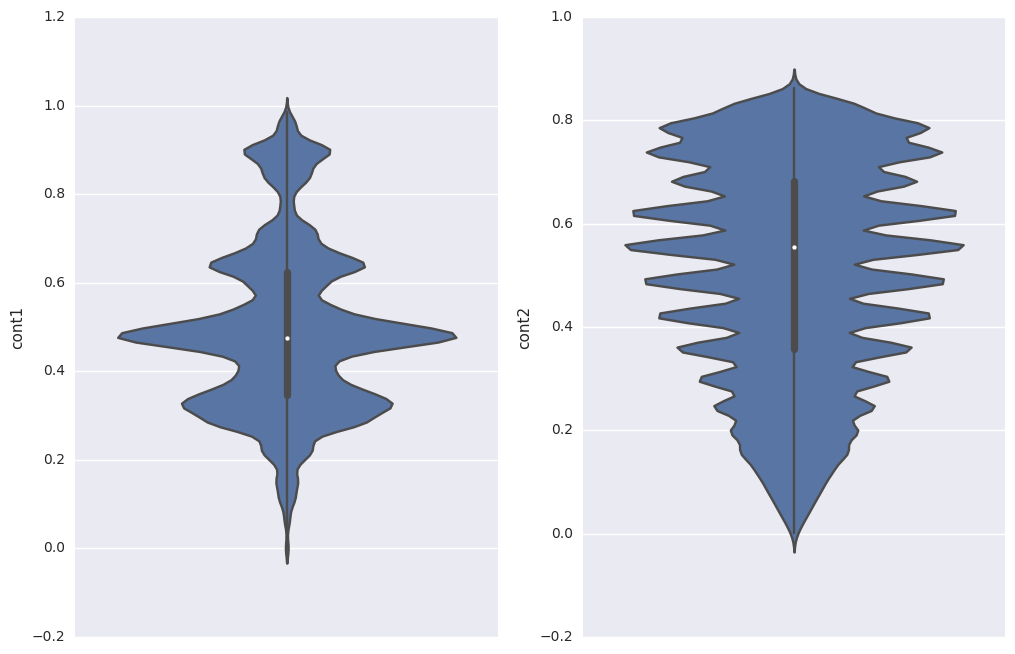

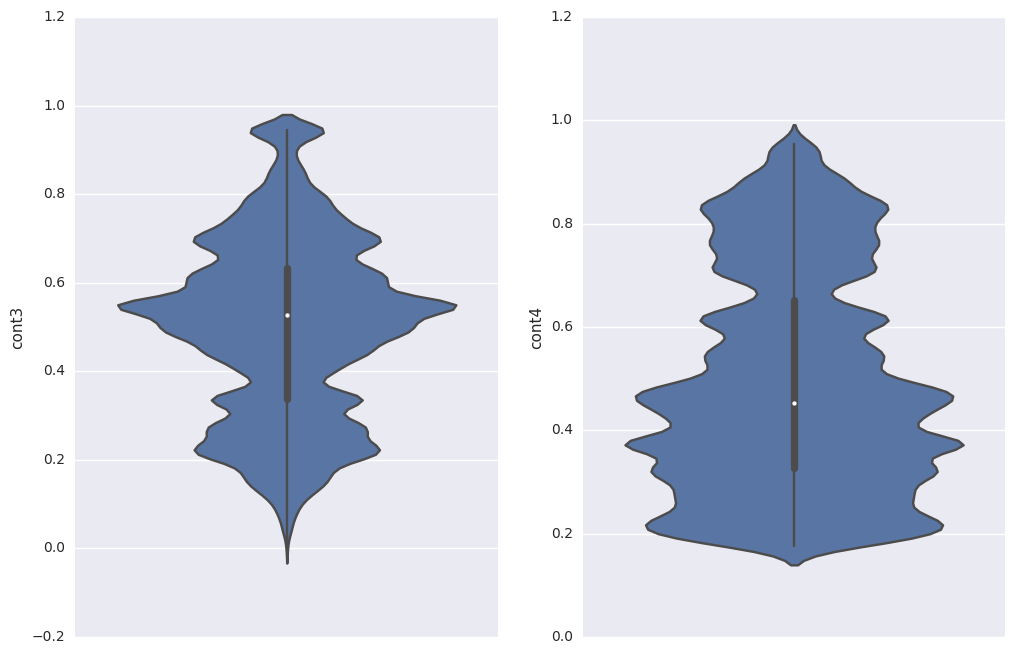

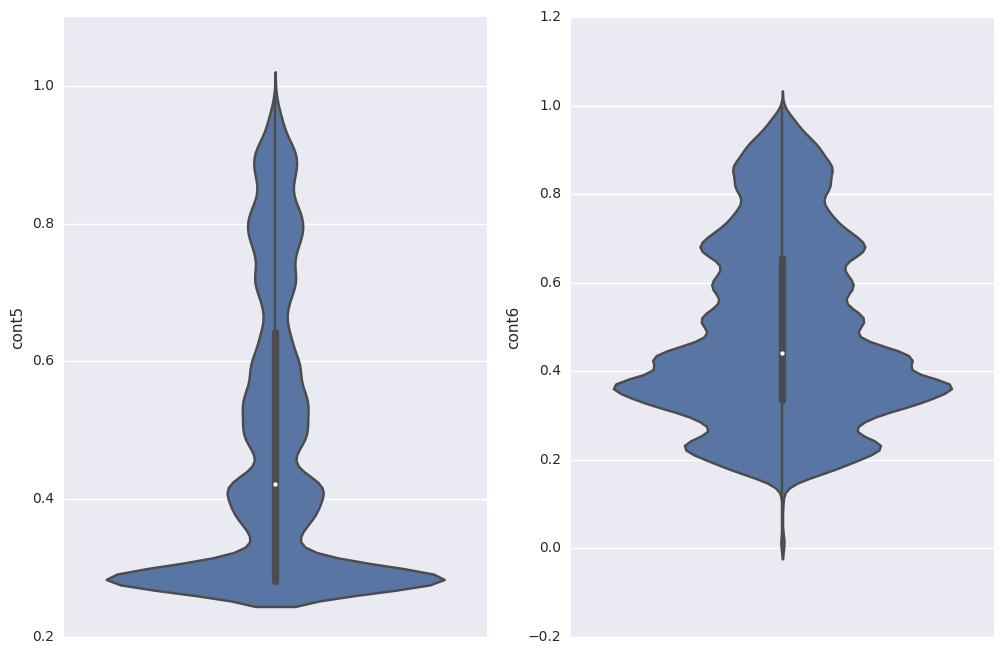

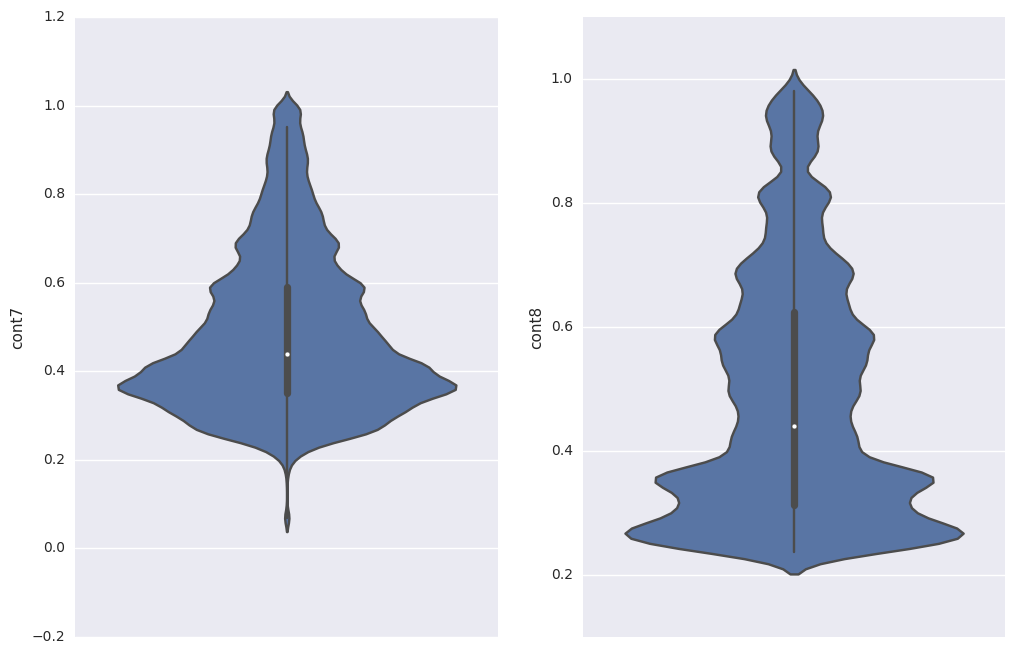

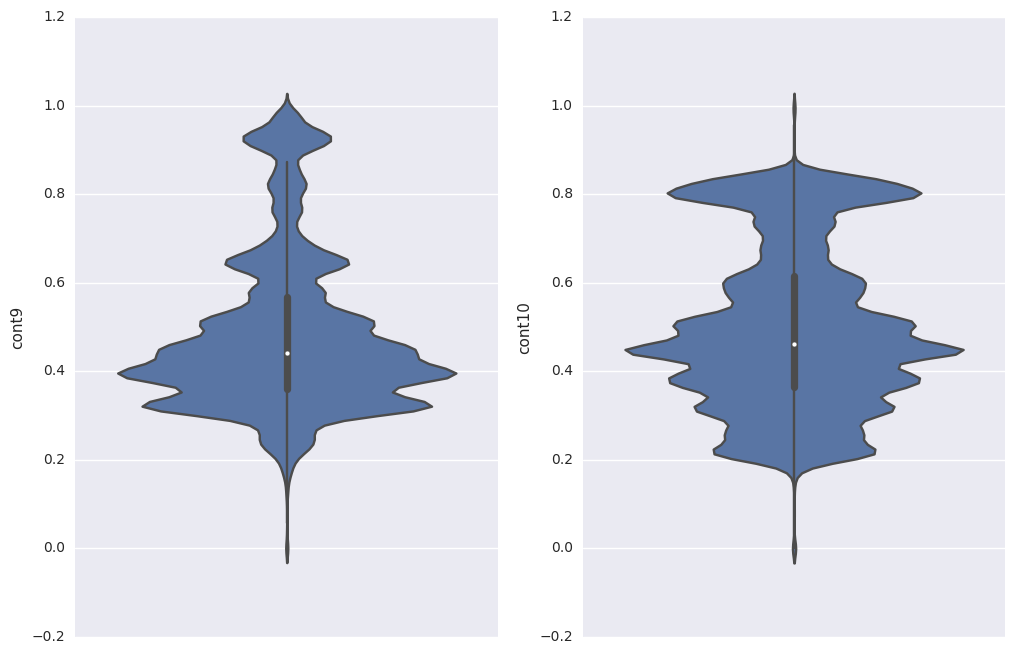

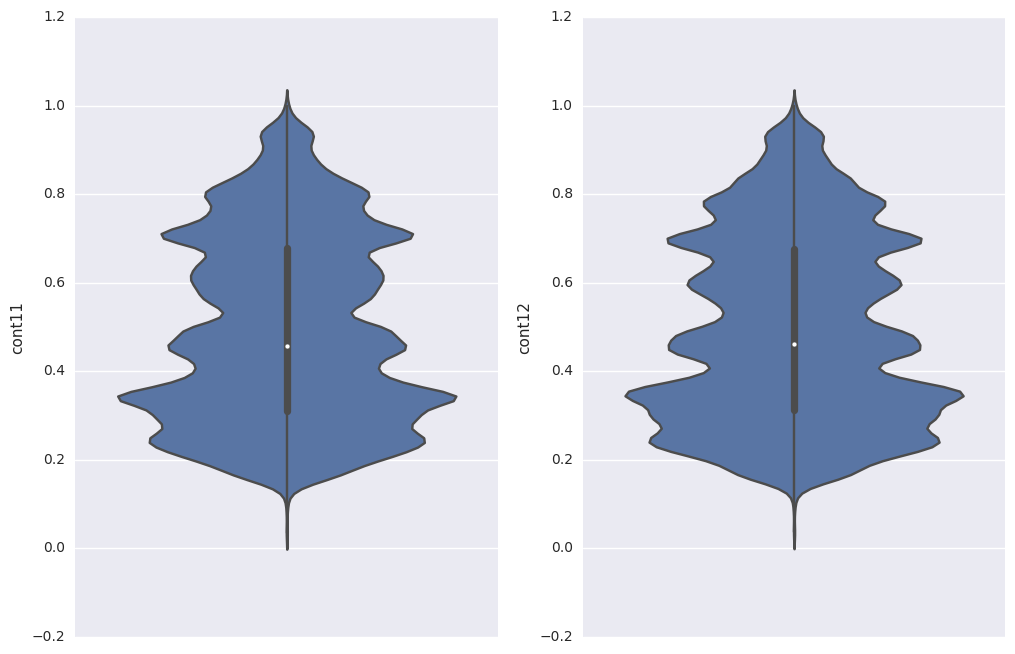

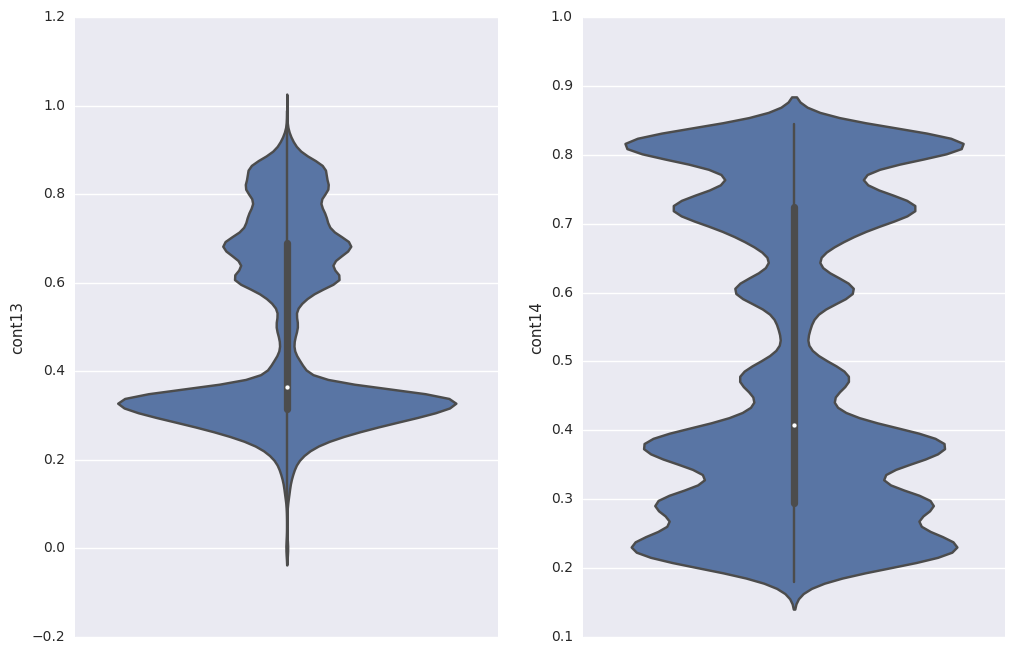

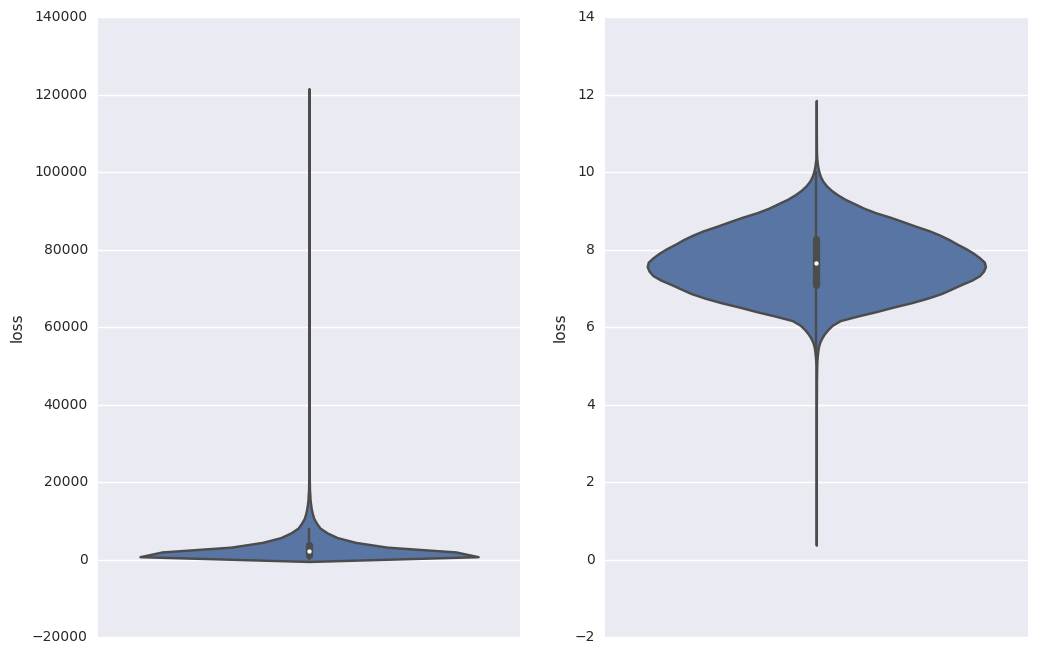

In [6]:
# Violin plots.

n_rows = 7
n_cols = 2
cols = cont_df.columns
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=cont_df, ax=ax[j])
        
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.violinplot(y="loss", data=target, ax=axs[0])
sns.violinplot(y="loss", data=np.log1p(target), ax=axs[1])

### Correlations

* (cont11, cont12) are too highly correlated, one should be removed
* The other pairs with abs(corr) > 0.75 demonstrate some positive correlation, possibly good candidates for PCA.

In [4]:
top_n = 10
correlations = cont_df.corr()
ordered = correlations.unstack().order(kind="quicksort").drop_duplicates()
neg_corr = ordered.iloc[:top_n]
pos_corr = ordered.iloc[-top_n-1:-1]

print(neg_corr)
print("")
print(pos_corr)

cont1  cont3    -0.445431
cont3  cont13   -0.418203
cont9  cont3    -0.417054
cont6  cont3    -0.349278
cont4  cont3    -0.341633
cont3  cont10   -0.325562
cont5  cont7    -0.249344
cont8  cont3    -0.185432
cont5  cont11   -0.151548
cont6  cont5    -0.149810
dtype: float64

cont1   cont6     0.758315
cont6   cont11    0.773745
        cont12    0.785144
cont10  cont9     0.785697
cont9   cont6     0.797544
cont1   cont10    0.808551
cont13  cont6     0.815091
cont10  cont6     0.883351
cont1   cont9     0.929912
cont11  cont12    0.994384
dtype: float64


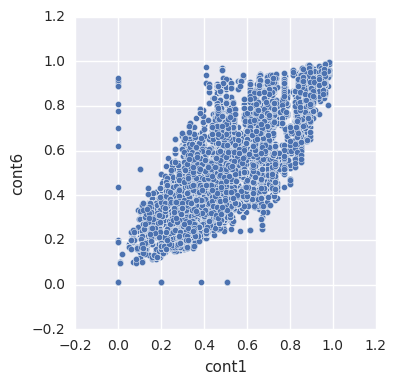

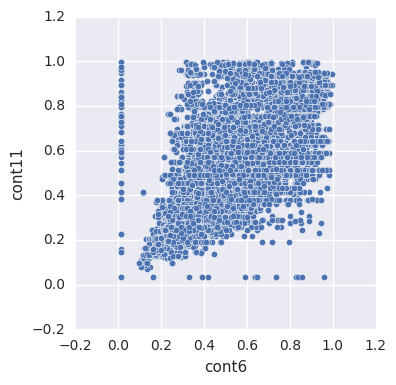

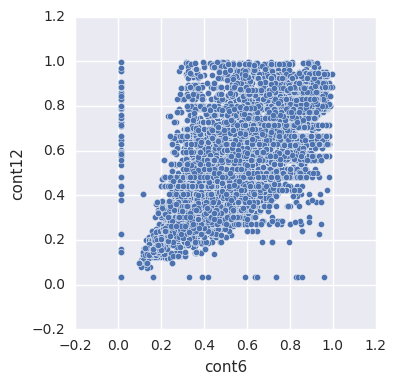

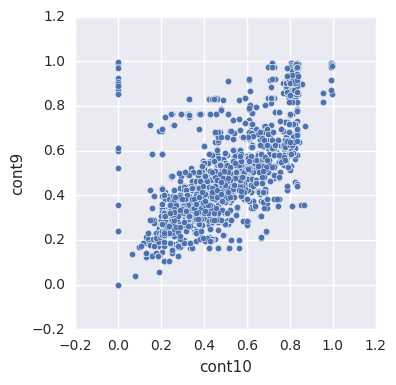

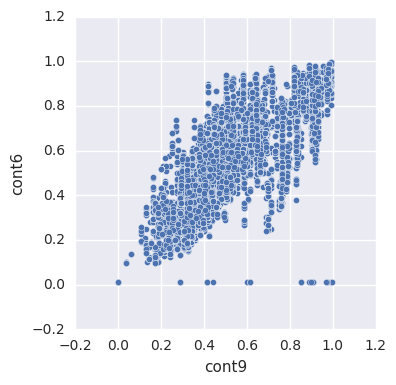

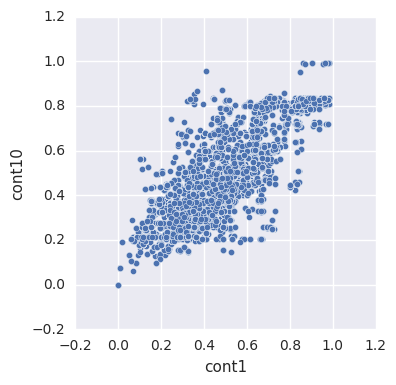

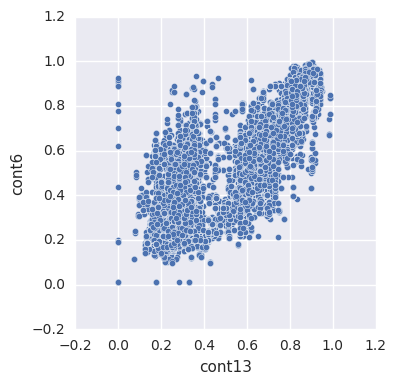

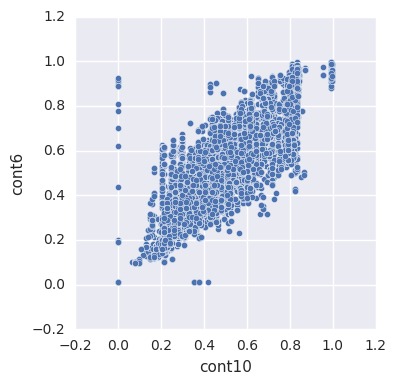

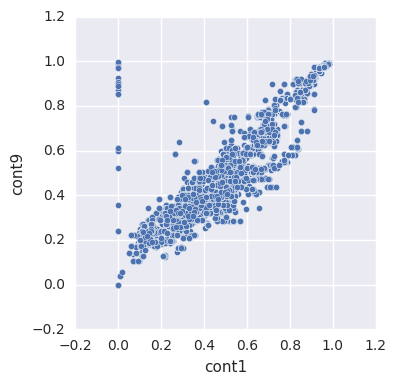

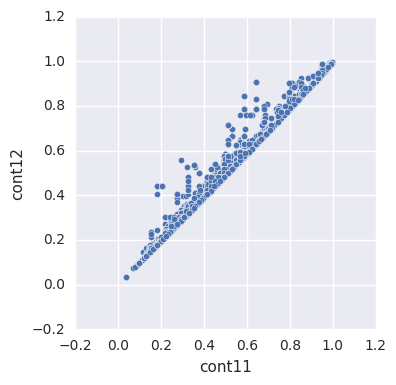

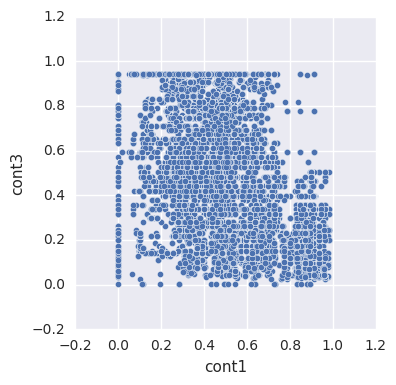

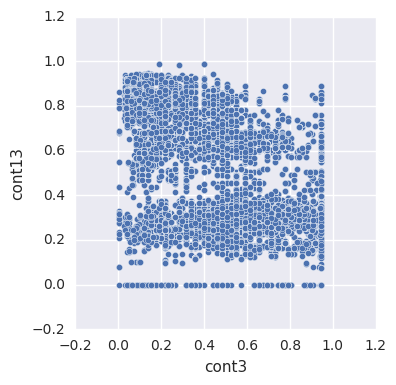

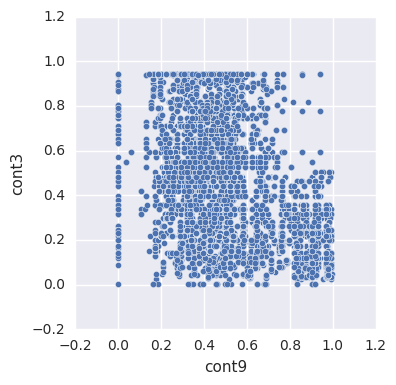

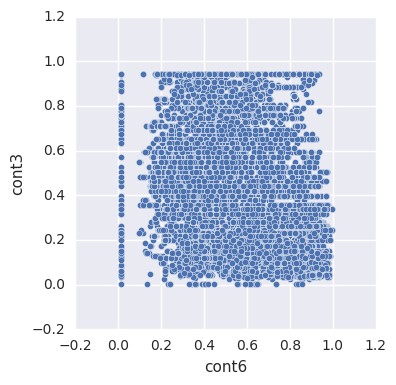

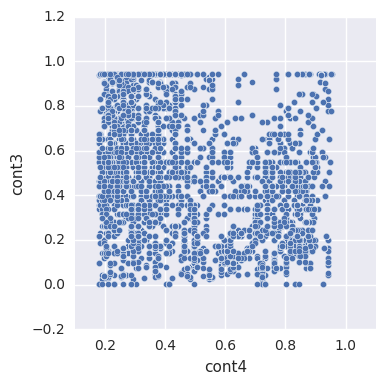

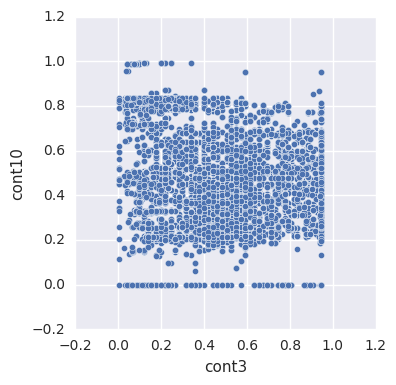

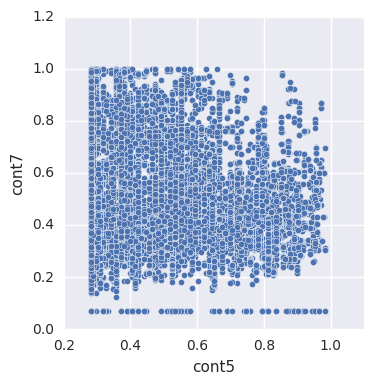

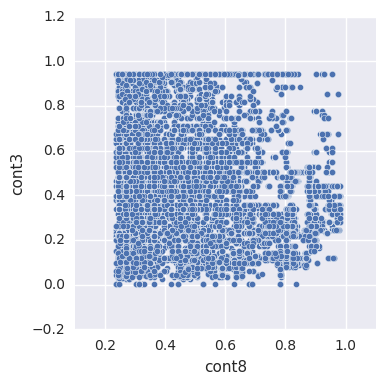

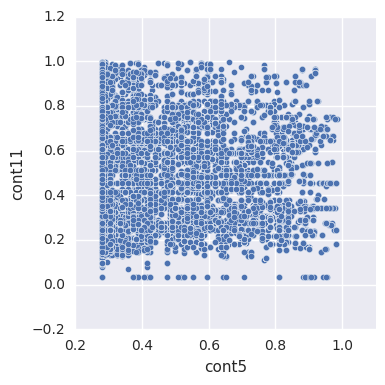

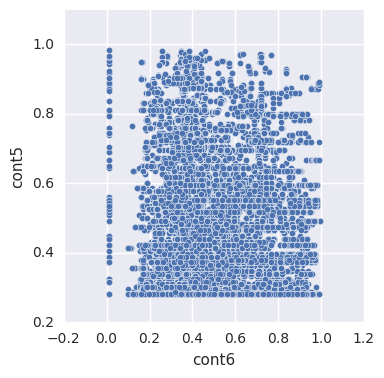

In [12]:
# Plot strongest-correlated feature pairs.
for i, j in pos_corr.index.tolist():
    sns.pairplot(cont_df, x_vars=i, y_vars=j, dropna=True, size=4, kind="scatter")
    
for i, j in neg_corr.index.tolist():
    sns.pairplot(cont_df, x_vars=i, y_vars=j, dropna=True, size=4, kind="scatter")

### Visualizing Categorical Variables

* cat1 through cat72 have two categories A and B, usually dominated by A.
* cat73 through cat98 have up to 7 categories.
* cat99 through cat116 have many categories.

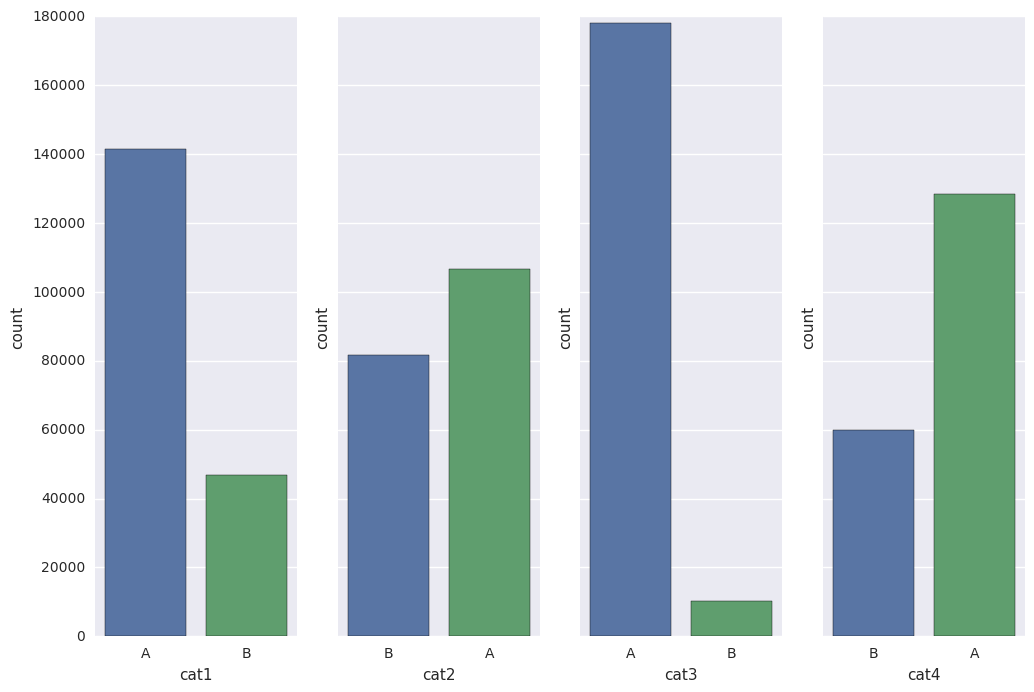

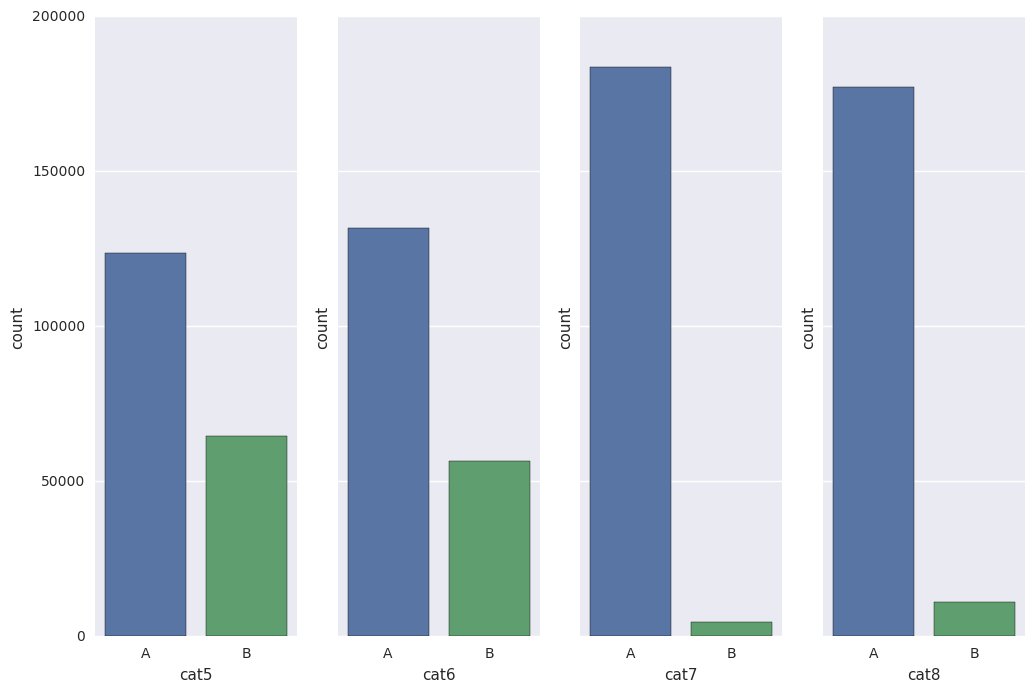

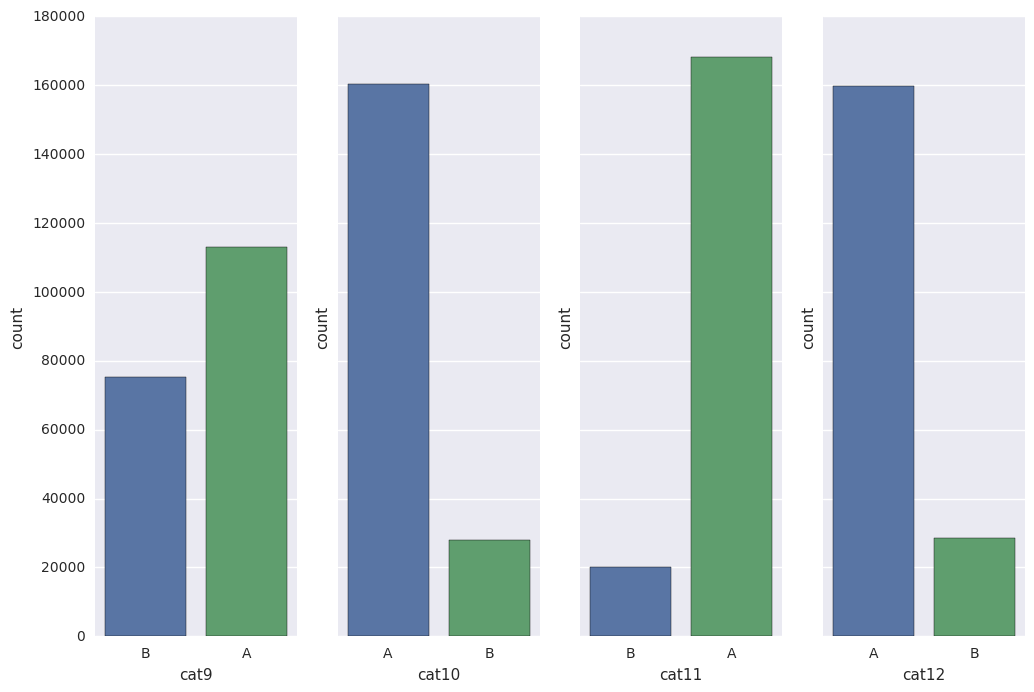

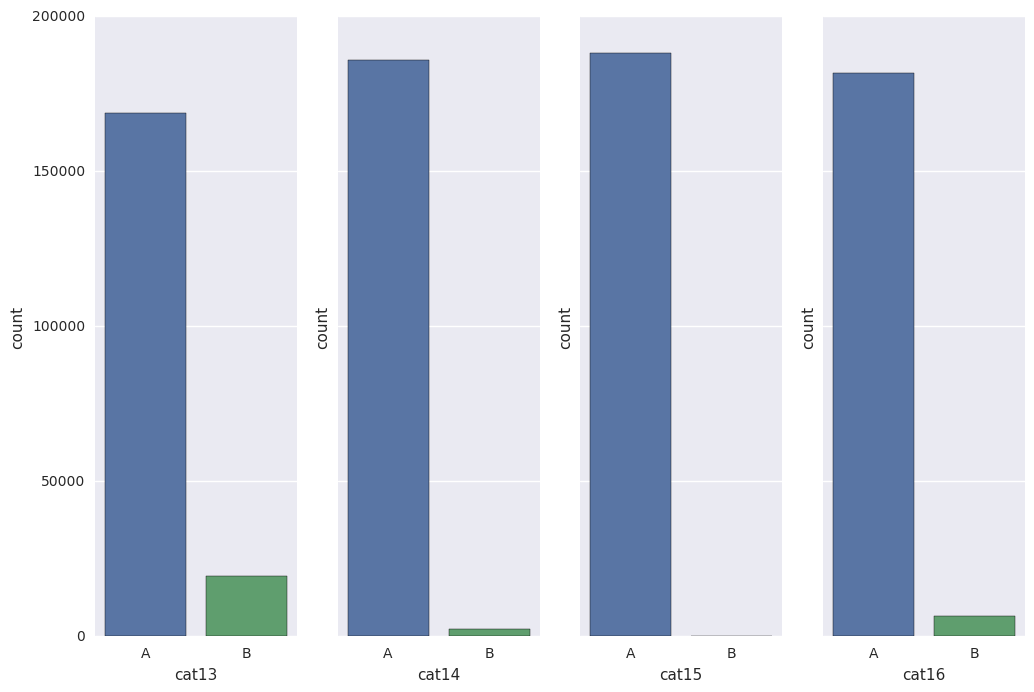

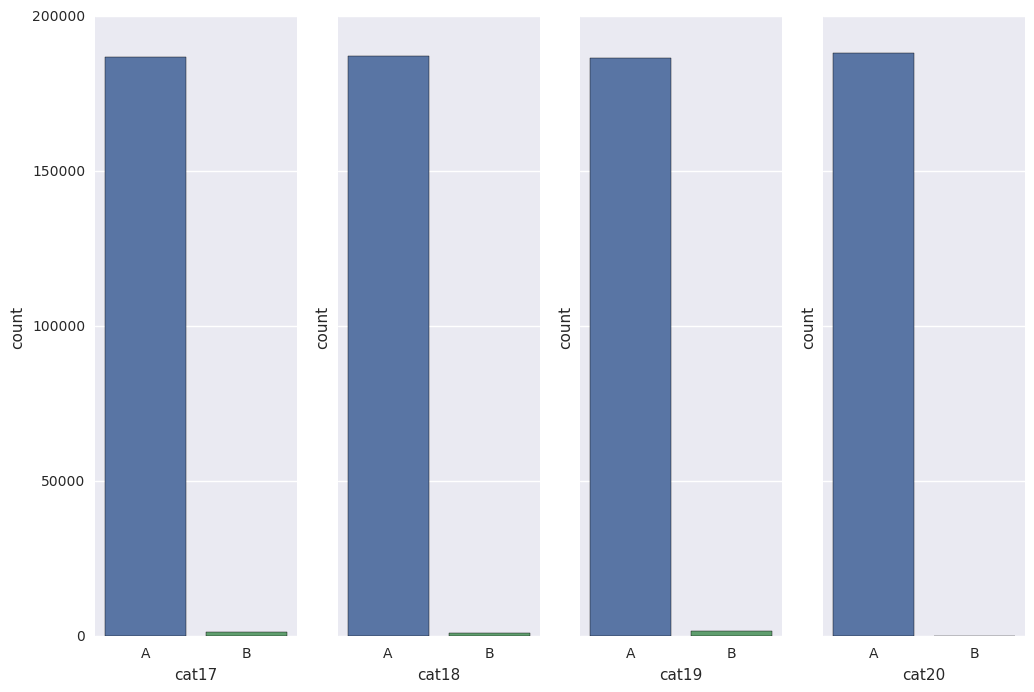

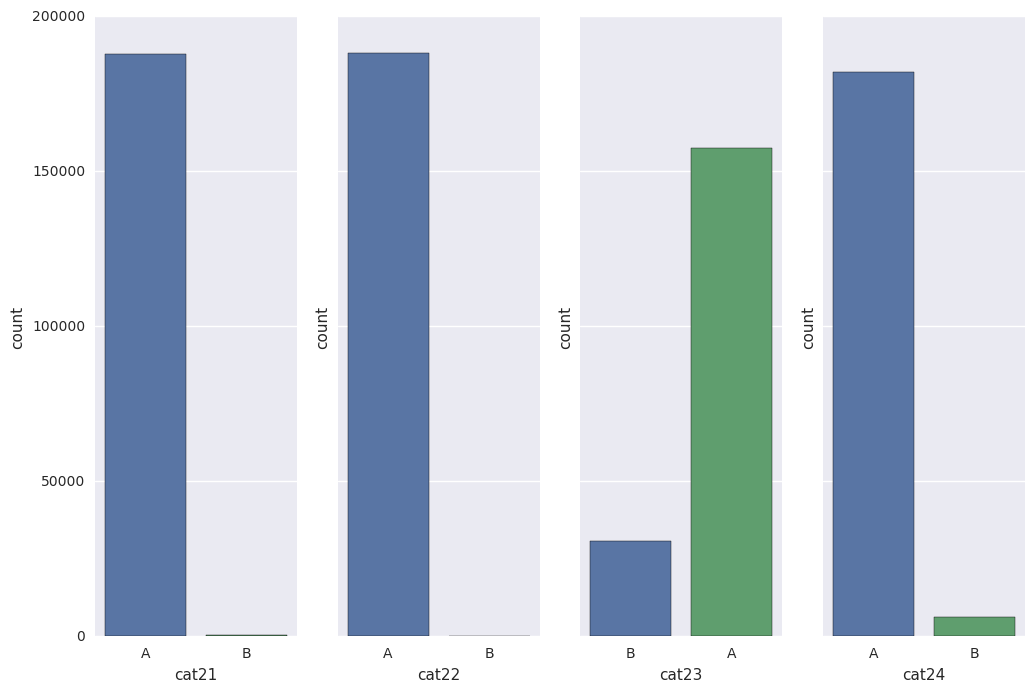

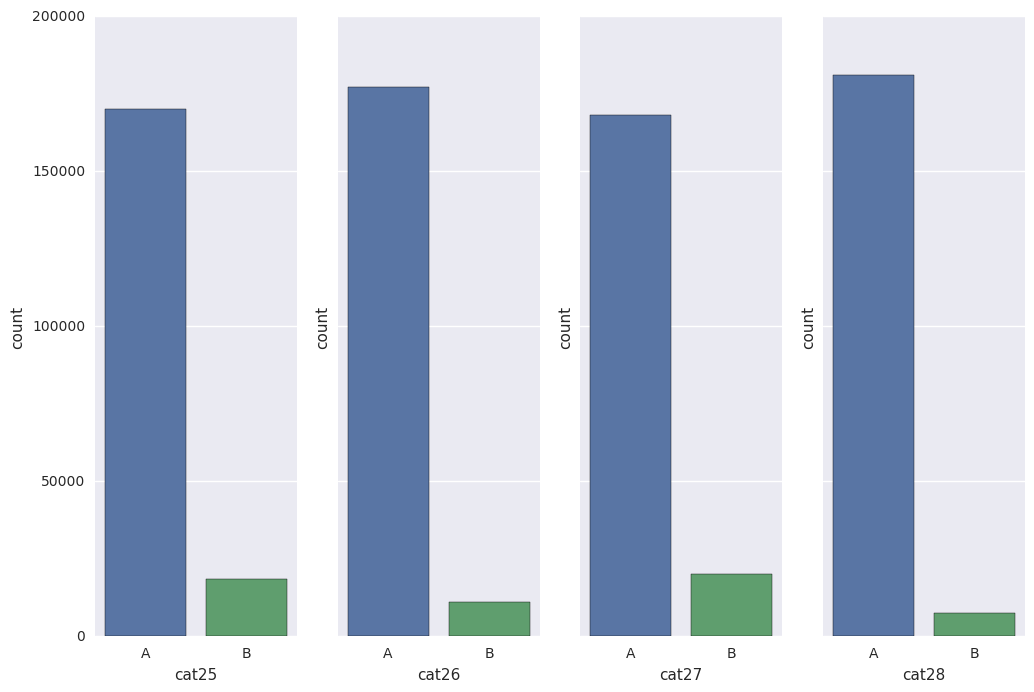

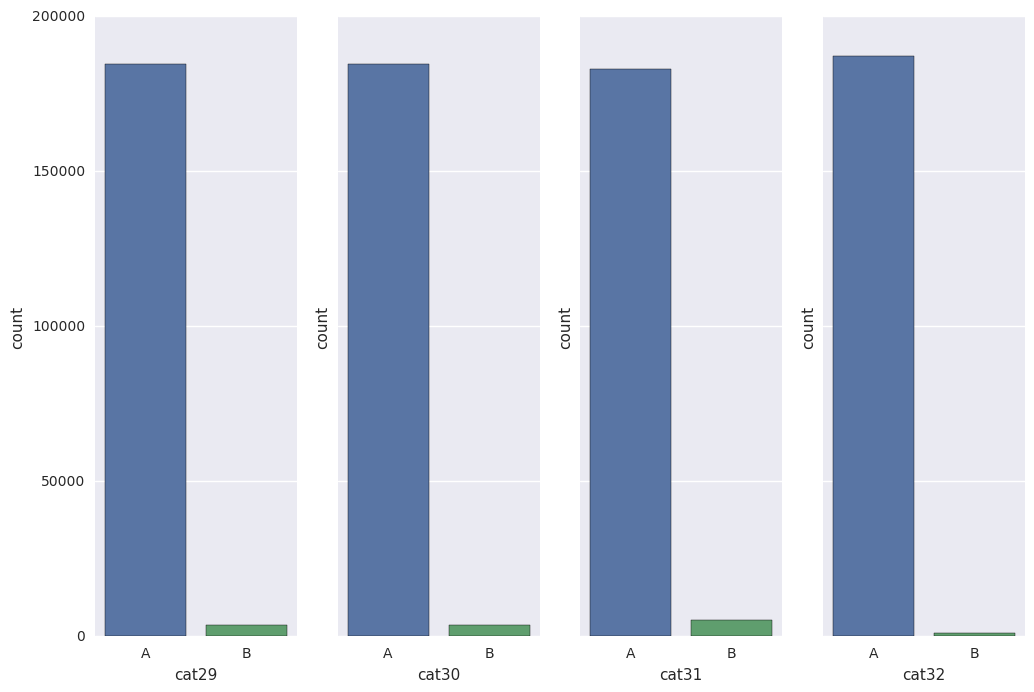

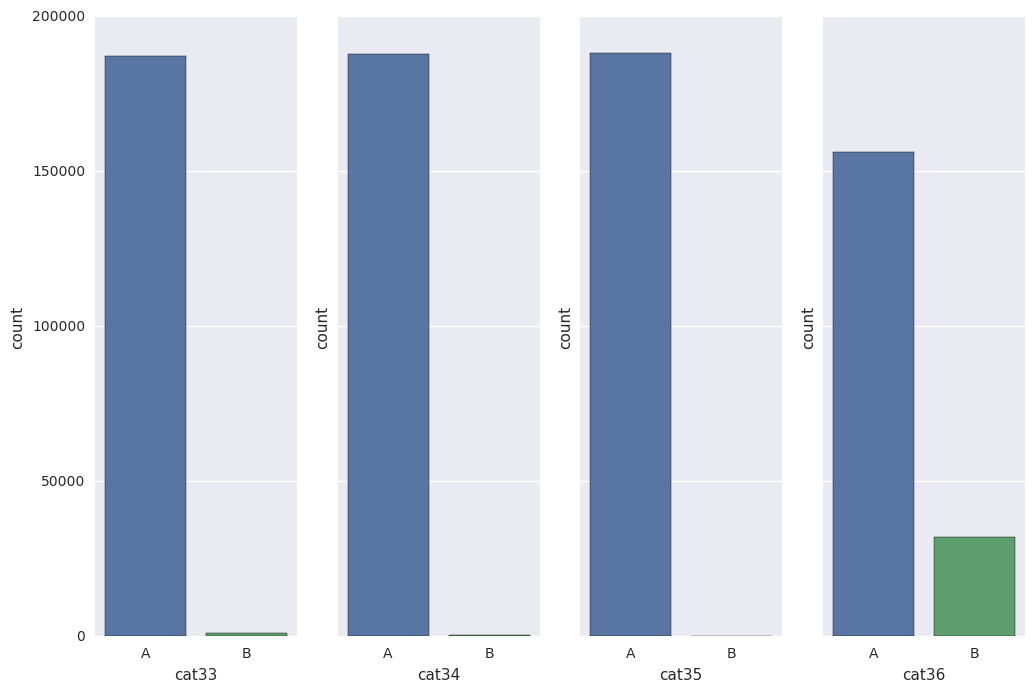

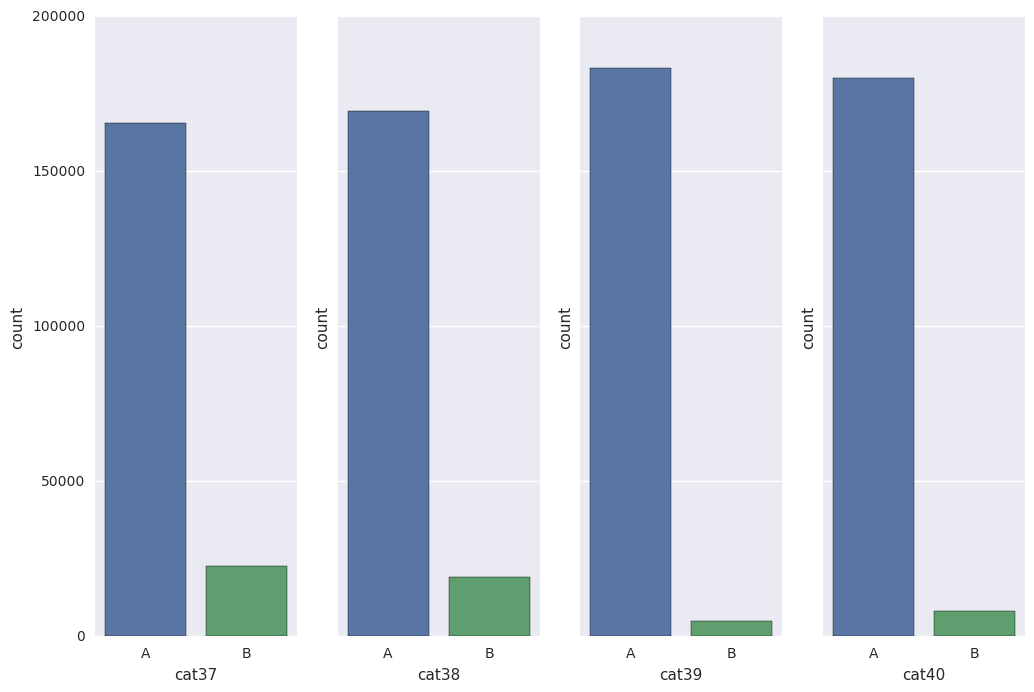

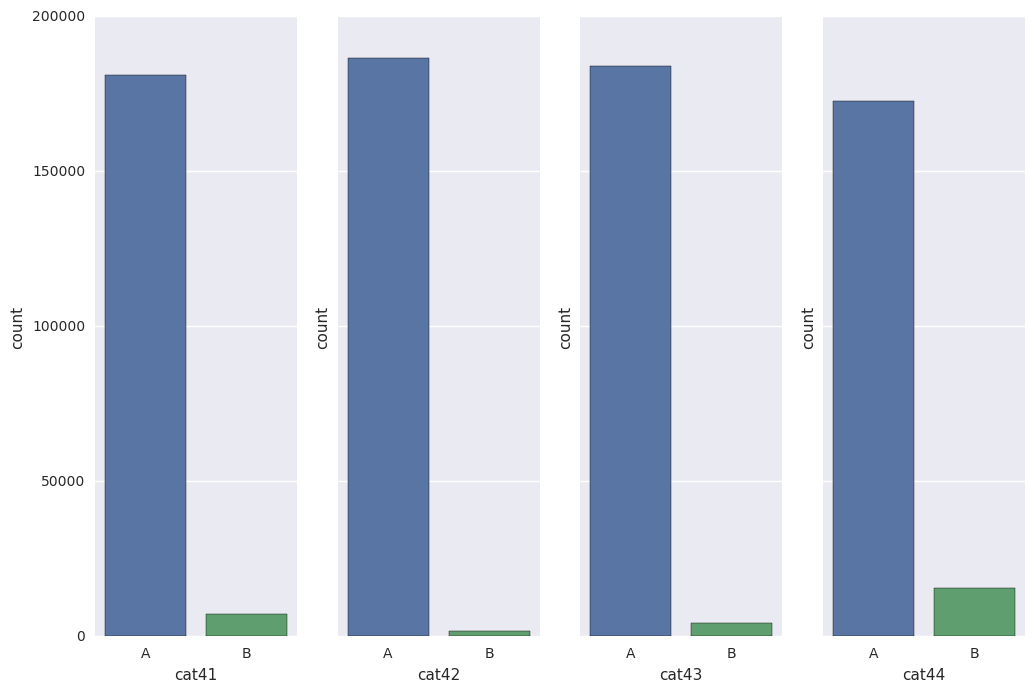

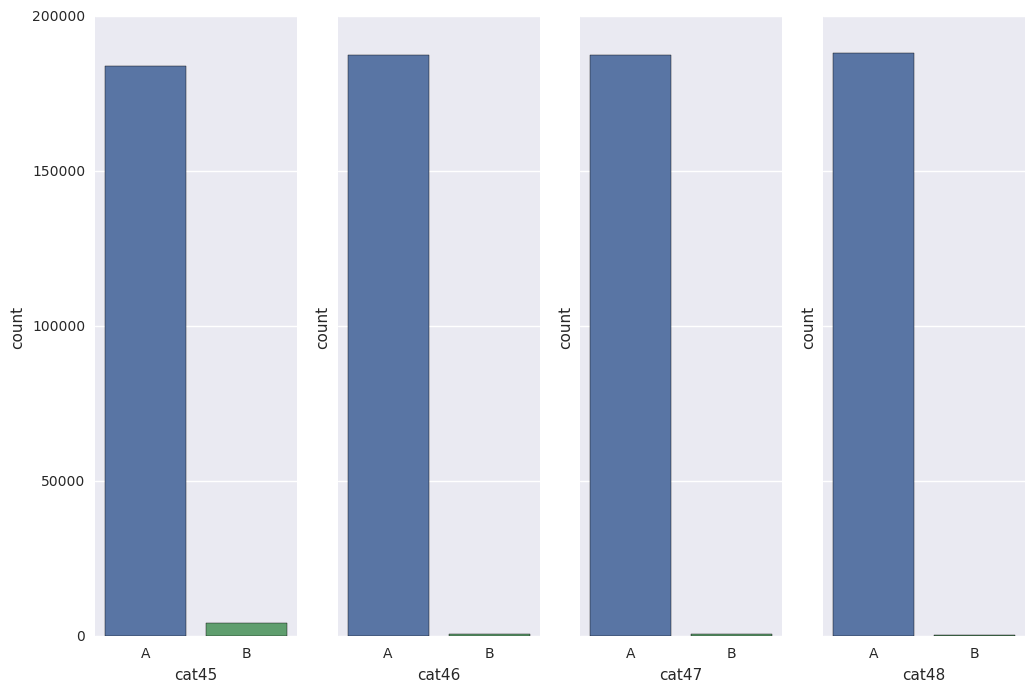

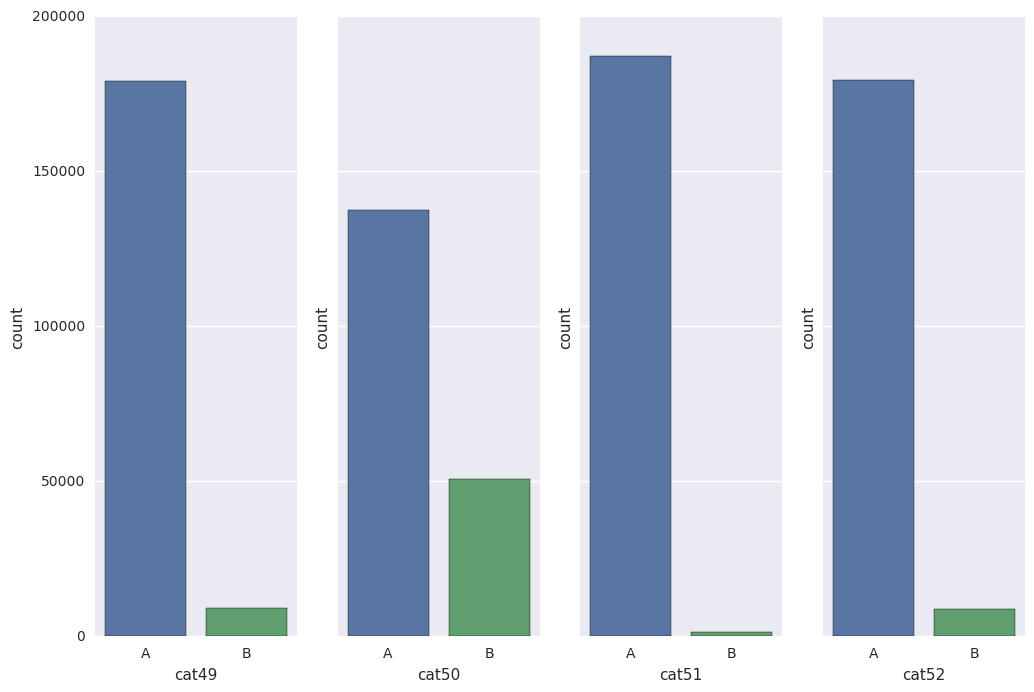

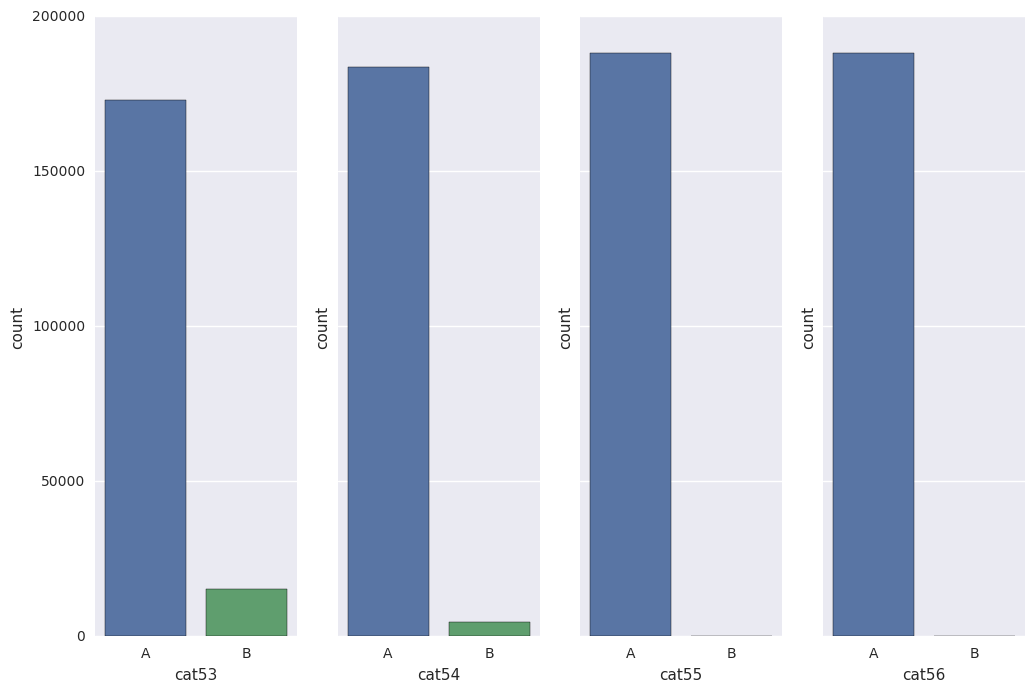

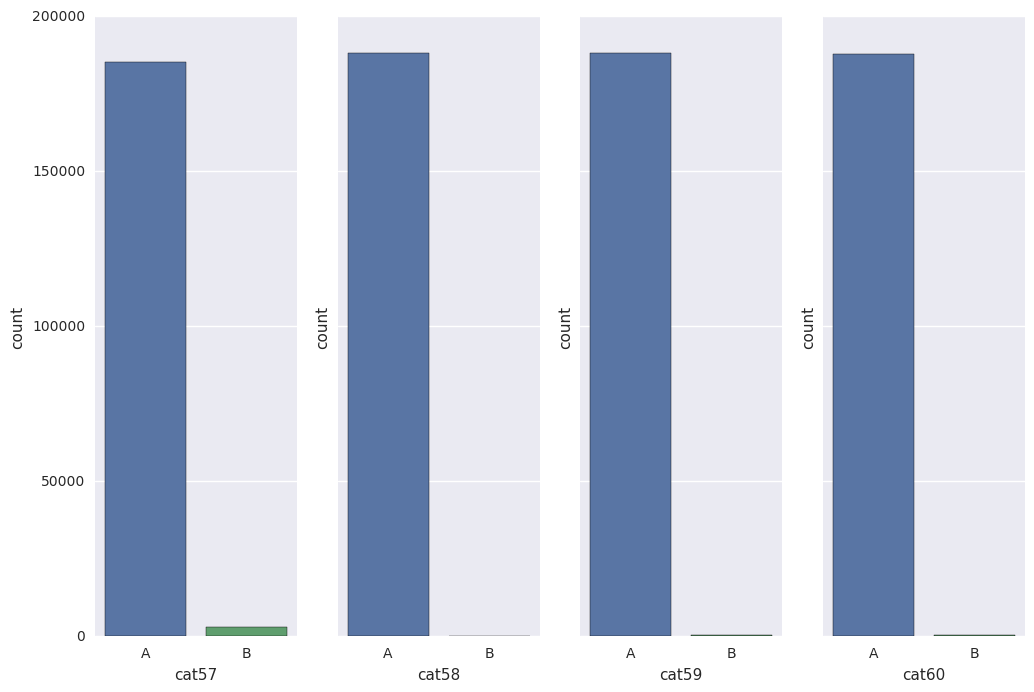

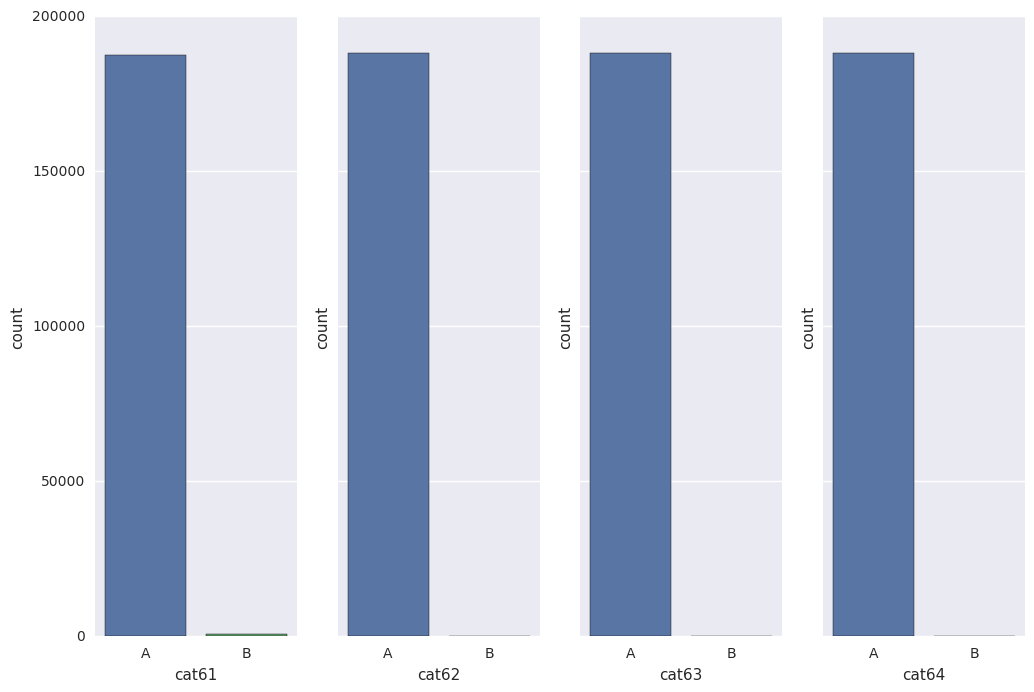

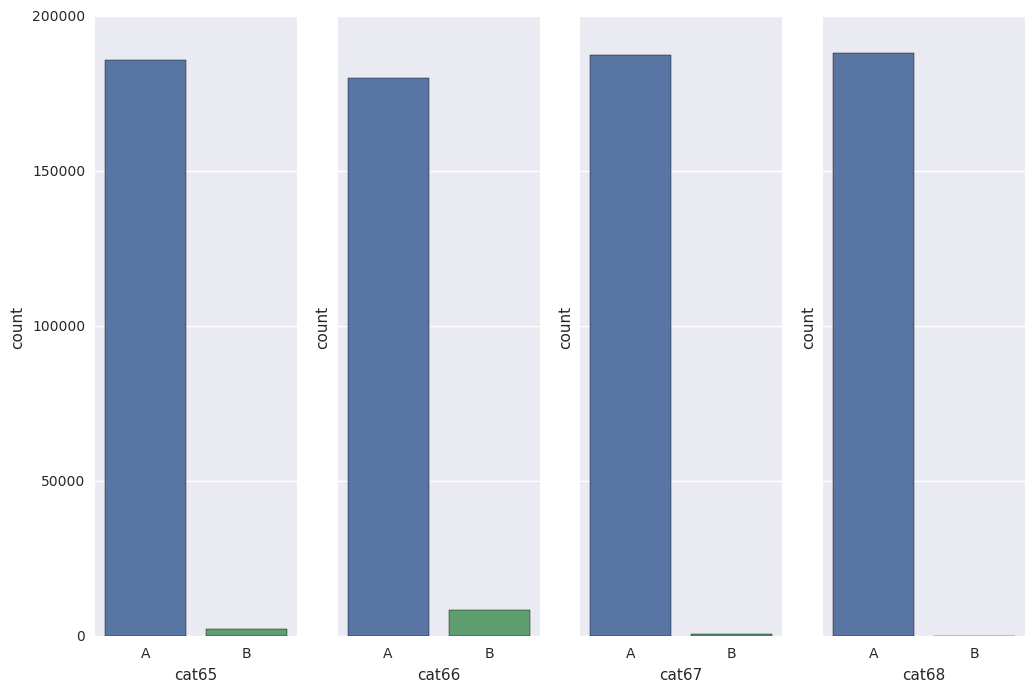

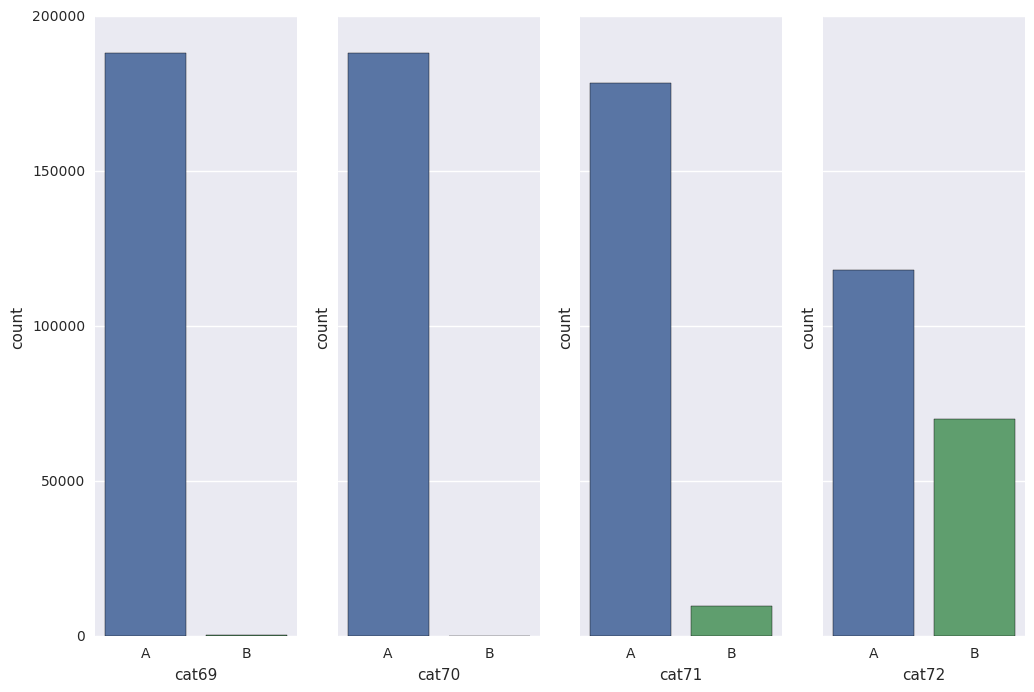

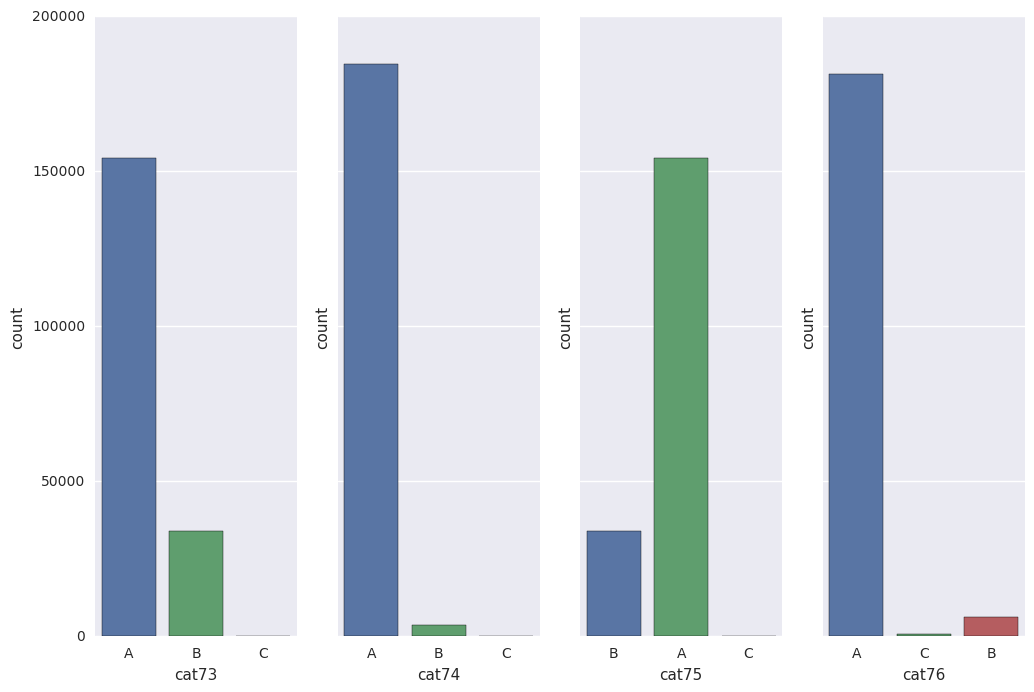

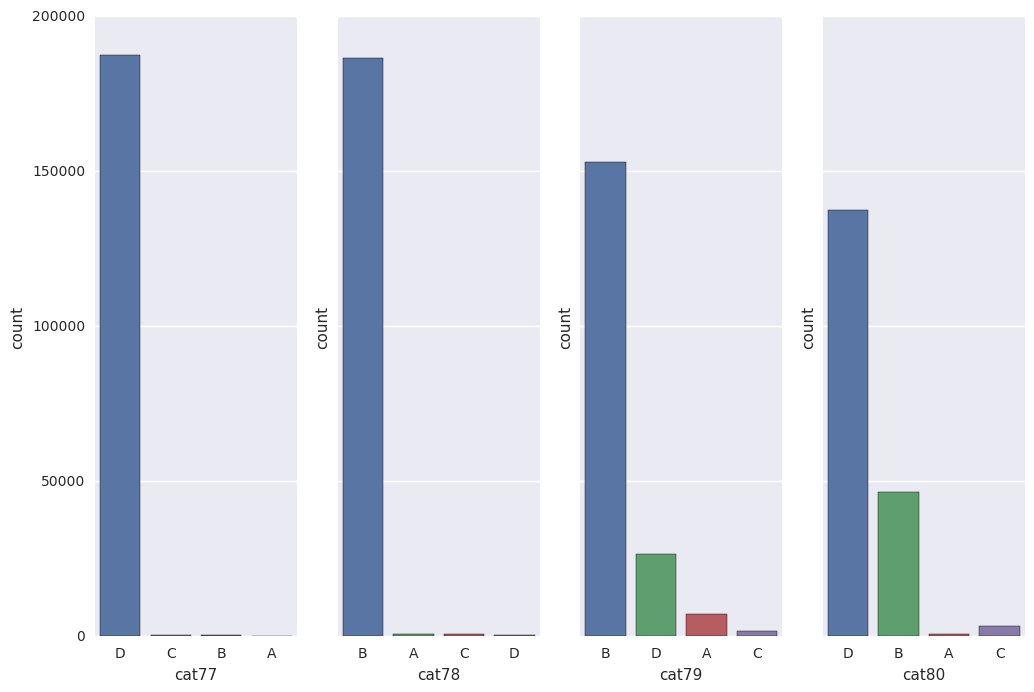

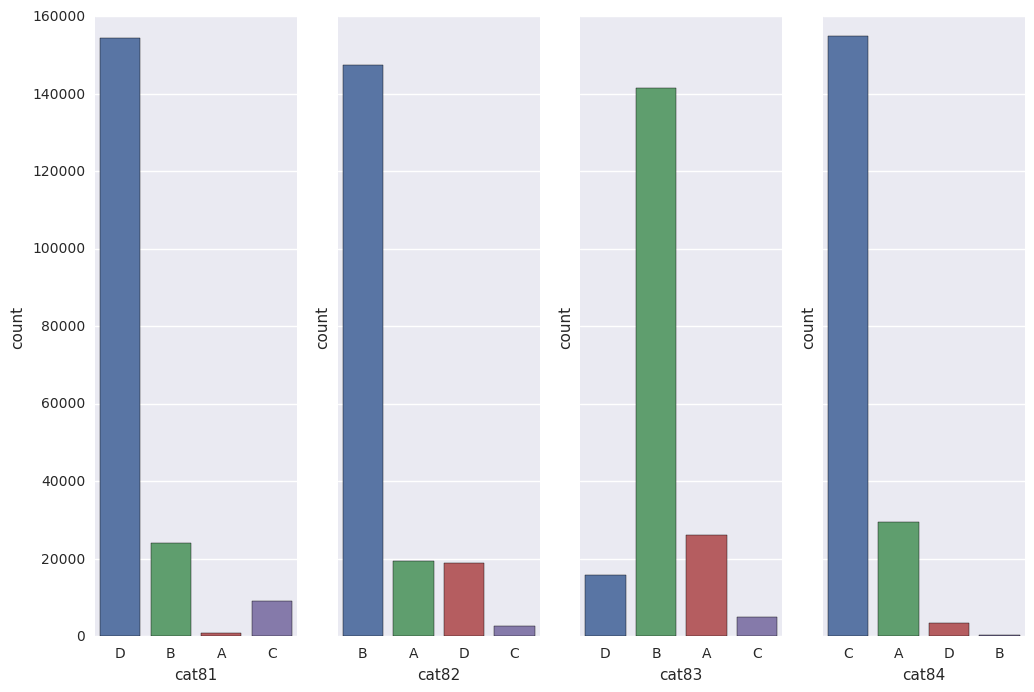

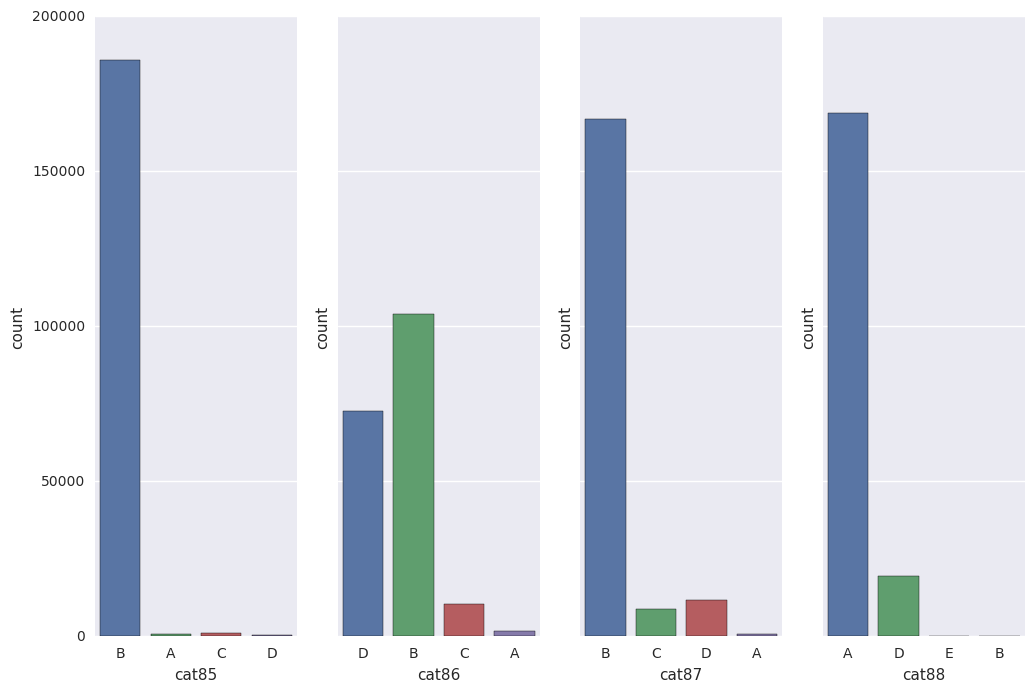

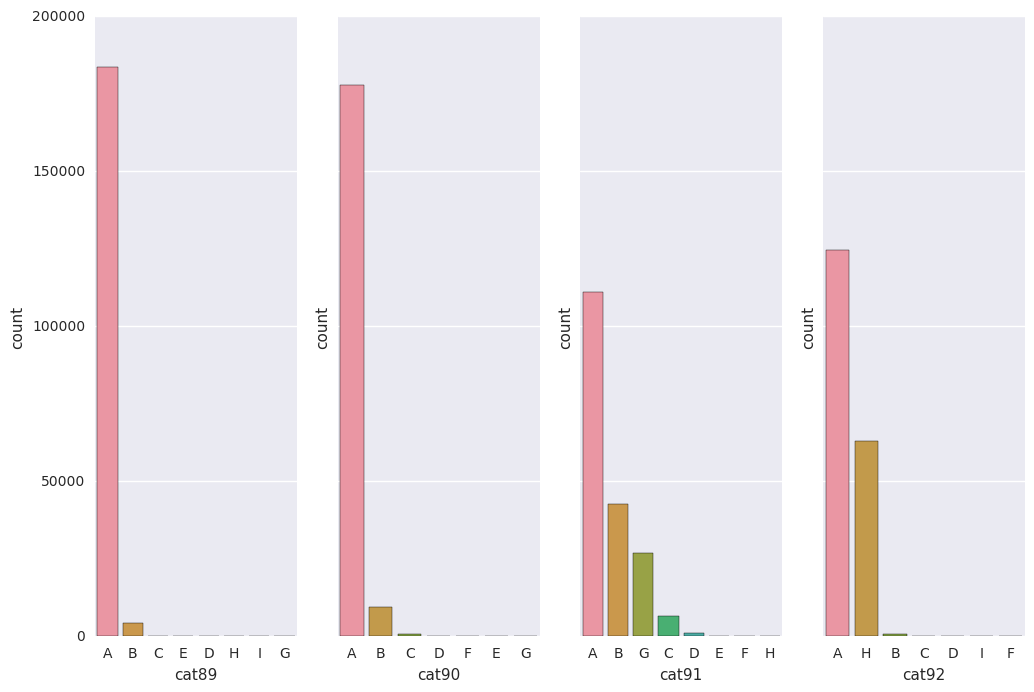

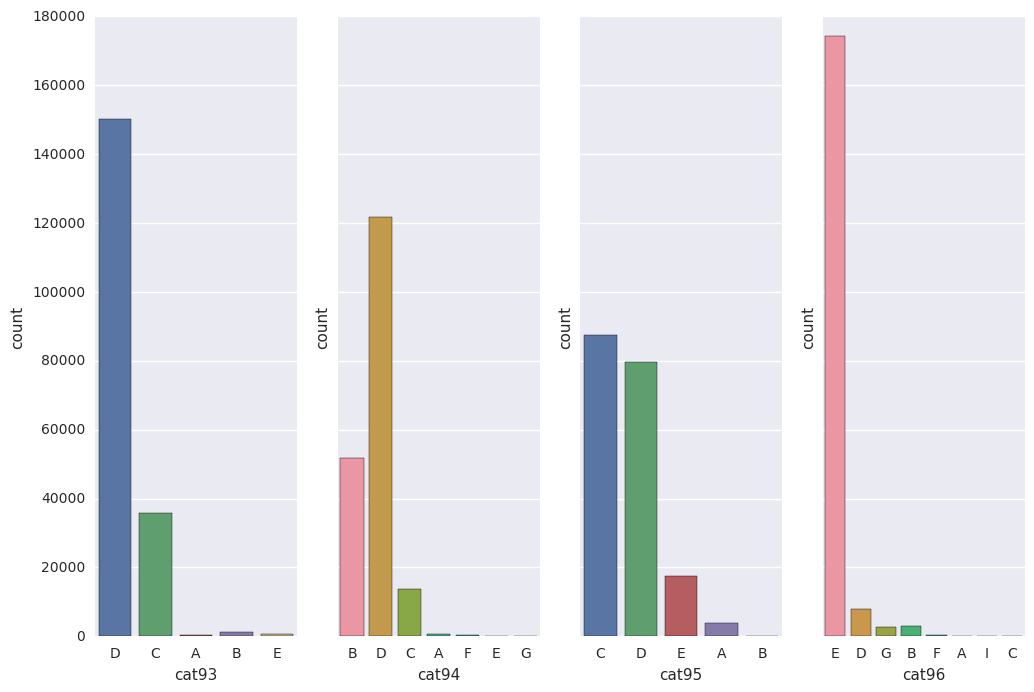

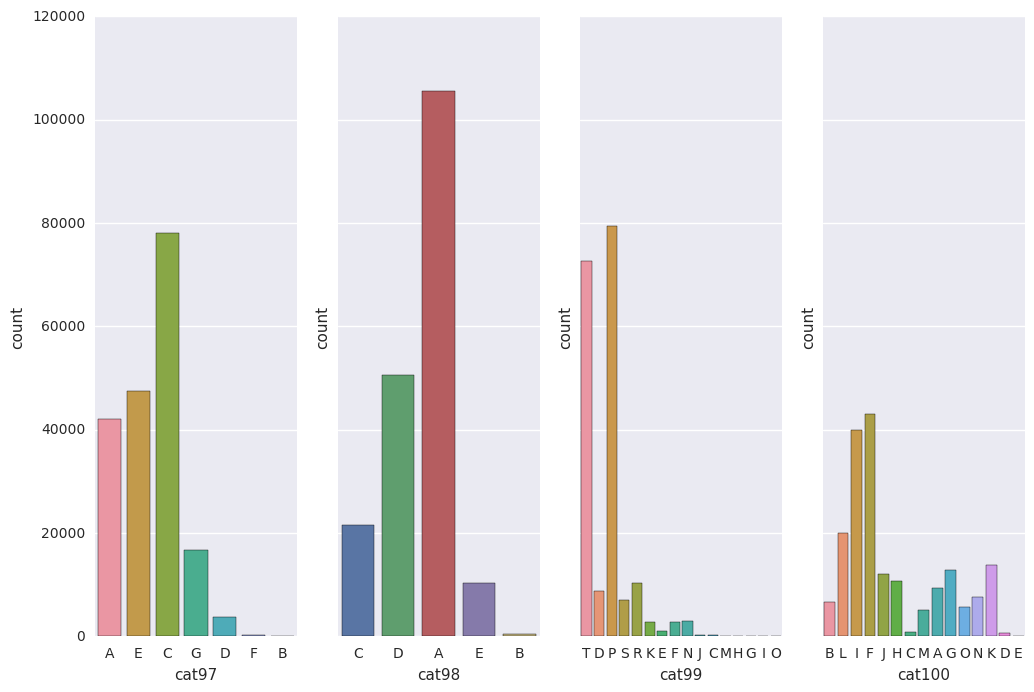

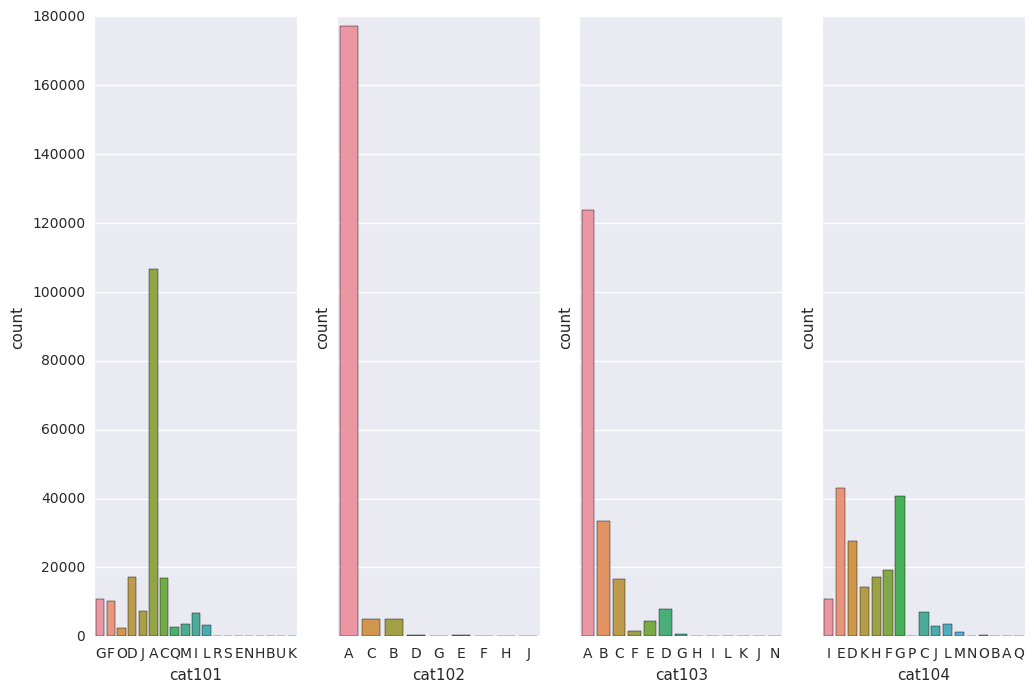

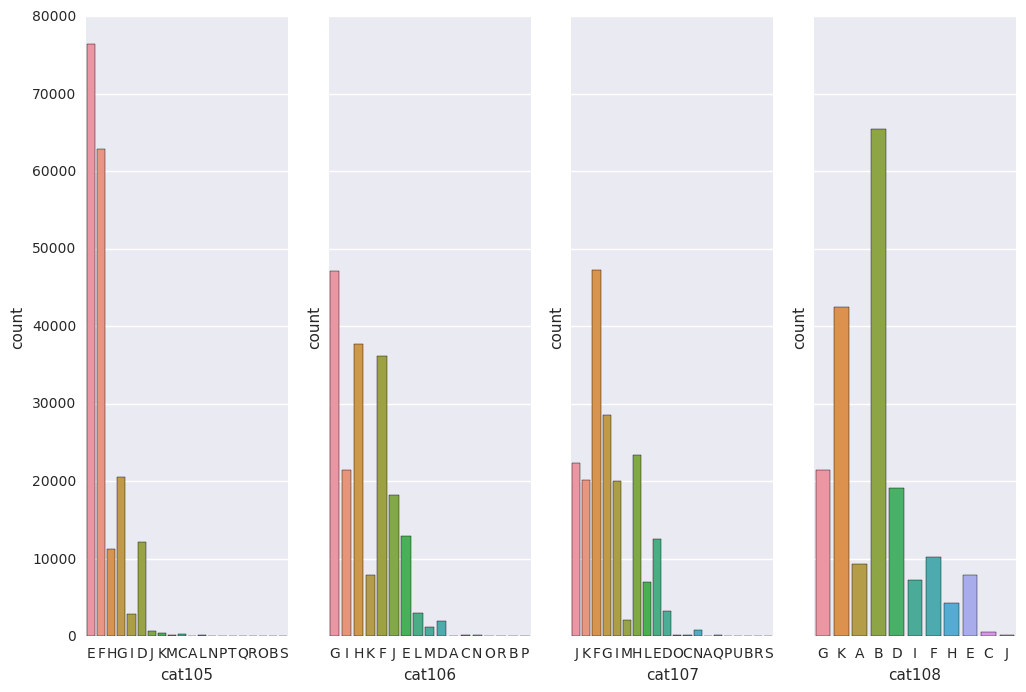

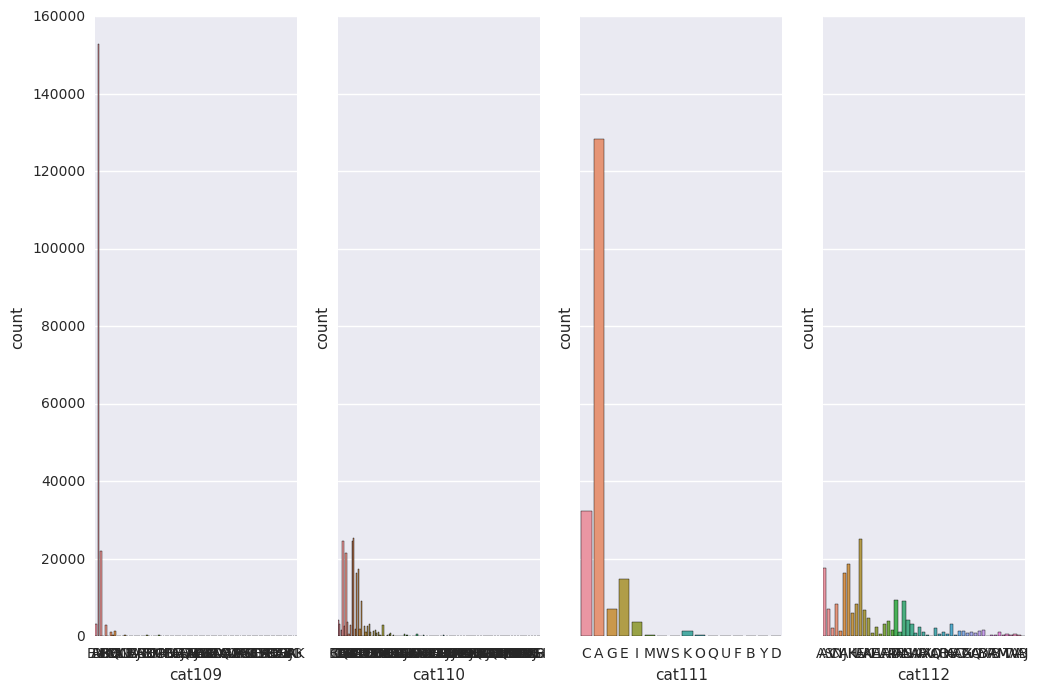

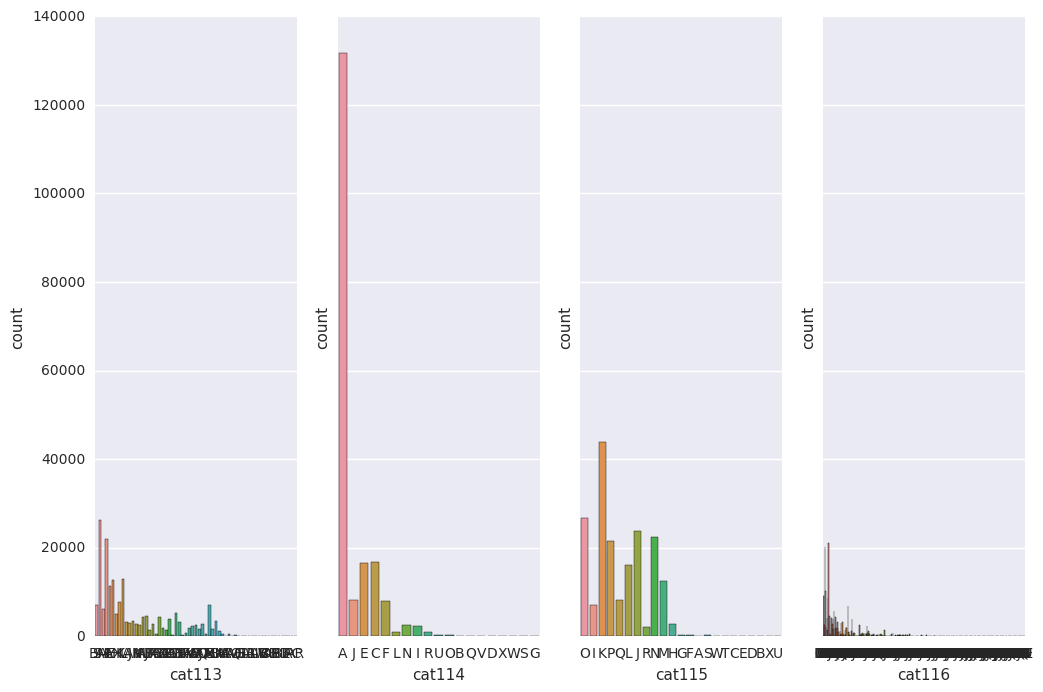

In [5]:
n_rows = 29
n_cols = 4
cols = cat_df.columns
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1, ncols=n_cols, sharey=True, figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=cat_df, ax=ax[j])